In [2]:
import numpy as np 
import pandas as pd 

In [3]:
df = pd.read_csv('Digit Recognizer.csv')

In [4]:
df.shape

(42000, 785)

In [5]:
df.sample(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
18493,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14525,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38090,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29828,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31526,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
import matplotlib.pyplot as plt

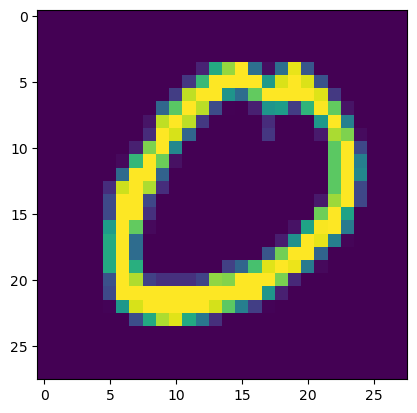

In [7]:
plt.imshow(df.iloc[13051,1:].values.reshape(28,28))

In [8]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
X_train.shape

(33600, 784)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn = KNeighborsClassifier()

In [13]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [14]:
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time() - start)

12.15618109703064


In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [17]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
# PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=200)

In [19]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [20]:
X_train_trf.shape

(33600, 200)

In [21]:
knn = KNeighborsClassifier()

In [22]:
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [23]:
y_pred = knn.predict(X_test_trf)

In [24]:
accuracy_score(y_test,y_pred)

0.9508333333333333

In [ ]:
for i in range(1,785):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)
    
    knn = KNeighborsClassifier()
    
    knn.fit(X_train_trf,y_train)
    
    y_pred = knn.predict(X_test_trf)
    
    print(accuracy_score(y_test,y_pred))
    

* 0.25761904761904764
* 0.32452380952380955
* 0.5103571428571428
* 0.6655952380952381
* 0.7378571428571429
* 0.8230952380952381
* 0.8436904761904762
* 0.871904761904762
* 0.8872619047619048
* 0.9064285714285715
* 0.9113095238095238
* 0.9183333333333333
* 0.9260714285714285
* 0.934047619047619
* 0.9383333333333334
* 0.9370238095238095
* 0.9398809523809524
* 0.940595238095238
* 0.9419047619047619
* 0.9433333333333334
* 0.9430952380952381

In [26]:
# transforming to a 2D coordinate system
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [27]:
X_train_trf

array([[-2.71868387, -0.49026199],
       [-0.67697605, -6.75362376],
       [-3.03322853,  6.5099217 ],
       ...,
       [ 2.14884771,  0.78086876],
       [ 1.05951385,  0.94709486],
       [17.70253267,  1.96129503]])

In [28]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 color=y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10
                )
fig.show()

c:\ProgramData\Anaconda3\lib\site-packages\plotly\express\_core.py:1979: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


In [42]:
# transforming in 3D
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [43]:
X_train_trf

array([[-2.71864061, -0.49048977,  1.13665404],
       [-0.67700627, -6.75375393, -2.3343269 ],
       [-3.03321636,  6.51035776,  7.49067612],
       ...,
       [ 2.14882662,  0.78099359, -0.74749464],
       [ 1.05957114,  0.94720747,  3.95002491],
       [17.70259733,  1.96155327, -4.94353121]])

In [44]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=X_train_trf[:,0], y=X_train_trf[:,1], z=X_train_trf[:,2],
              color=y_train_trf)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

c:\ProgramData\Anaconda3\lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [45]:
pca.explained_variance_
# Eigen values

array([40.67111198, 29.1702338 , 26.74459552])

In [46]:
pca.components_
# Eigen vectors

array([[-1.84563199e-18,  2.53463367e-17,  1.03344137e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 7.35172683e-18, -9.08942039e-17, -8.95496675e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 1.00872133e-17, -2.46874133e-17,  2.11792807e-17, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [47]:
pca.components_.shape

(3, 784)

In [48]:
pca.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239])

In [49]:
pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [36]:
pca.explained_variance_.shape

(784,)

In [37]:
pca.components_.shape

(784, 784)

In [38]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

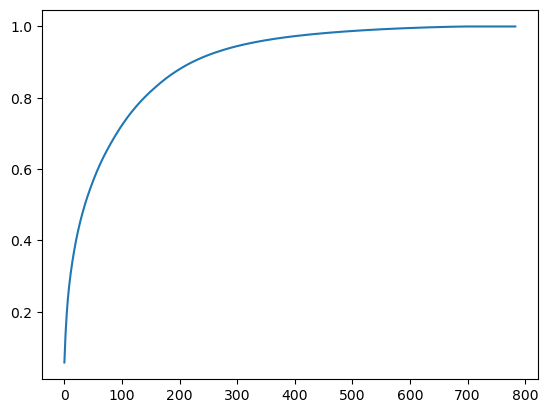

In [39]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))